##LAB 13 Algorithmic Toolbox – Week 5 – Programming Challenges

#####Presentado por: Diego Nicolas Rubio Lopez - Grupo 19

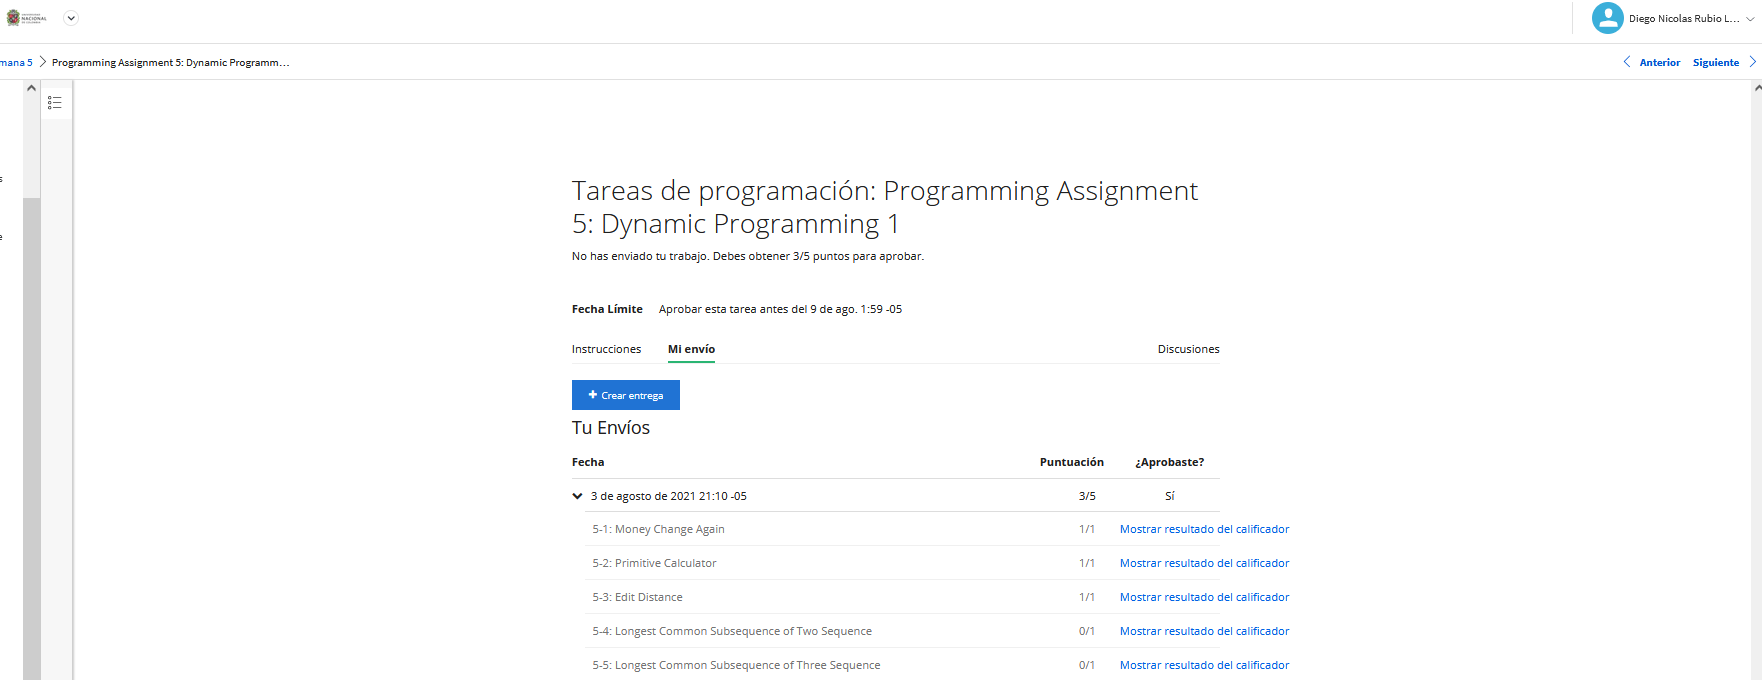

###1. Money Change

In [1]:
import math

money = int(input())
den = [1, 3, 4]
min = [0] + [math.inf]*money

for i in range(1, money+1):
    for j in den:
        if i>=j:
            coins = min[i-j]+1
            if coins < min[i]:
                min[i] = coins

print(min[money])

5
2


###2. Primitive Calculator

In [2]:
import math

n = int(input())

n_op = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = n_op[i-1] + 1 
    if i%2 == 0: temp2 = n_op[i//2] + 1
    if i%3 == 0: temp3 = n_op[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    n_op[i] = min_ops

print(n_op[n])

nums = [n]
while n!=1:
    if n%3 ==0 and n_op[n]-1 == n_op[n//3]:
        nums += [n//3]
        n = n//3
    elif n%2 ==0 and n_op[n]-1 == n_op[n//2]:
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

print(' '.join([str(i) for i in nums][::-1]))

1
0
1


###3. Edit Distance

In [3]:
import numpy

def EditDistance(s1, s2):  
    ln_s1 = len(s1)
    ln_s2 = len(s2)
   
    m = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        m[0][i] = i

    for i in range(ln_s1+1):
        m[i][0] = i
    
    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = m[i][j-1]   + 1
            deletion  = m[i-1][j]   + 1
            mismatch  = m[i-1][j-1] + 1
            match     = m[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                m[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                m[i][j] = min(insertion, deletion, mismatch)
    
    return (int(m[ln_s1][ln_s2]), m)

def OptimalAlignment(m, s1, s2, top, bottom, i, j):    

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and m[i][j] == m[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return OptimalAlignment(m, s1, s2, top, bottom, i-1, j)

    elif j>0 and m[i][j] == m[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return OptimalAlignment(m, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return OptimalAlignment(m, s1, s2, top, bottom, i-1, j-1)

if __name__ == '__main__':
    s1, s2 = input(), input()
    edit_distance, mca = EditDistance(s1, s2)    

    print(f'{edit_distance}')
    

car
cam
1
